# Dataset Analysis

In [4]:
import cv2
import os
import re

In [14]:
image_ext = ['.bmp', '.png', '.jpg']
def natural_sort(l):
    def convert(text): return int(text) if text.isdigit() else text.lower()
    def alphanum_key(key): return [convert(c)
                                   for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)


def get_image_list(path):
    image_names = []
    for maindir, subdir, file_name_list in os.walk(path):
        for filename in file_name_list:
            apath = os.path.join(maindir, filename)
            ext = os.path.splitext(apath)[1]
            if ext in image_ext:
                image_names.append(apath)
    return natural_sort(image_names)

def read_gt(label):
    with open(label) as f:
        labels = []
        Lines = f.readlines()
        for line in Lines:
            label = int(line.strip().split(' ')[0])
            x = float(line.strip().split(' ')[1])  # x_width
            y = float(line.strip().split(' ')[2])  # x_height
            w_r = float(line.strip().split(' ')[3])
            h_r = float(line.strip().split(' ')[4])
            labels.append([label, x, y, w_r, h_r])
    f.close()
    return labels

In [23]:
def norm2realpixel(label,img_h,img_w):
    x = label[1]*img_w
    y = label[2]*img_h
    w = label[3]*img_w
    h = label[4]*img_h
    return x,y,w,h

In [ ]:
jpg

In [15]:
#cigarette
#person
#smoke

In [51]:
pathtrain = '/home/caki/desktop/projects/cig/dataset/train'
pathtest = '/home/caki/desktop/projects/cig/dataset/test'
pathval = '/home/caki/desktop/projects/cig/dataset/valid'

image_list_train = get_image_list(pathtrain)
image_list_test = get_image_list(pathtest)
image_list_val = get_image_list(pathval)

In [52]:
print('train set', len(image_list_train))
print('test set', len(image_list_test))
print('val set', len(image_list_val))

train set 2284
test set 135
val set 370


In [ ]:
image_list_train

In [56]:
with open(r'./val.txt', 'w') as fp:
    for item in image_list_val:
        # write each item on a new line
        fp.write("%s\n" % item)

In [25]:
label_dict = {}

In [44]:
image_height = []
image_width = []
for img_path in image_list_val:
    label_path = img_path[:img_path.rfind('.')] + '.txt'
    img = cv2.imread(img_path,0)
    img_h, img_w = img.shape
    image_height.append(img_h)
    image_width.append(img_w)
    labels = read_gt(label_path)
    for label in labels:
        label_cls = label[0]
        x,y,w,h = norm2realpixel(label, img_h, img_w)
        if label_cls not in label_dict:
            label_dict[label_cls] = []
            label_dict[label_cls].append([x,y,w,h])
        else:
            label_dict[label_cls].append([x,y,w,h])

In [39]:
import pandas as pd
df = pd.DataFrame(label_dict[0], columns = ['x', 'y', 'w', 'h'])
df

,x,y,w,h
0,241.0,230.5,18.5,8.5
1,118.0,190.0,14.5,6.5
2,124.5,192.5,24.0,7.0
3,244.0,231.0,17.5,10.0
4,240.5,229.0,18.0,8.0
...,...,...,...,...
2057,181.0,86.0,6.5,7.5
2058,216.0,224.5,5.0,13.0
2059,181.0,88.0,4.5,9.0
2060,176.0,130.0,5.0,9.0


<AxesSubplot:ylabel='Frequency'>

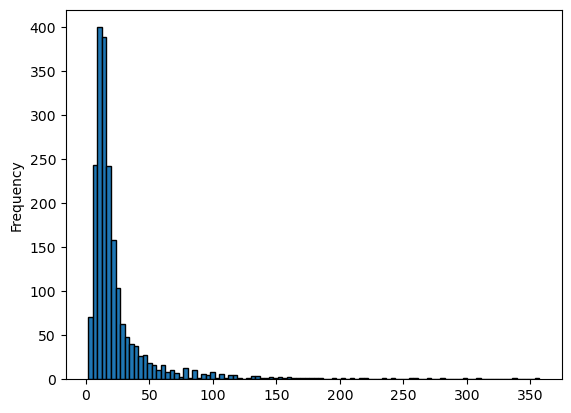

In [48]:
df['w'].plot(kind='hist', edgecolor='black',bins=100)

<AxesSubplot:ylabel='Frequency'>

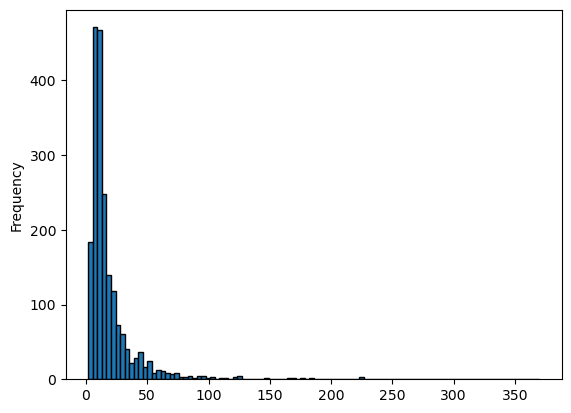

In [49]:
df['h'].plot(kind='hist', edgecolor='black',bins=100)

In [36]:
label_dict[0]

[[241.00000000000003, 230.5, 18.5, 8.5],
 [118.0, 190.0, 14.5, 6.5],
 [124.5, 192.5, 24.0, 7.0],
 [244.0, 231.0, 17.5, 10.0],
 [240.5, 229.00000000000003, 18.0, 8.0],
 [252.99999999999997, 228.00000000000003, 25.0, 11.5],
 [127.00000000000001, 192.5, 27.5, 5.0],
 [129.0, 191.5, 27.5, 5.0],
 [156.0, 191.0, 26.0, 6.5],
 [134.0, 185.0, 18.0, 6.0],
 [164.0, 222.0, 15.5, 9.5],
 [144.0, 200.5, 9.0, 10.0],
 [205.5, 230.5, 32.5, 13.0],
 [213.99999999999997, 223.0, 20.5, 10.0],
 [146.5, 200.0, 6.5, 8.0],
 [160.0, 199.5, 7.499999999999999, 8.0],
 [213.99999999999997, 224.0, 21.5, 9.0],
 [186.0, 197.5, 14.999999999999998, 5.5],
 [219.49999999999997, 224.0, 17.5, 8.0],
 [217.5, 221.0, 32.0, 10.0],
 [188.0, 196.5, 16.5, 6.0],
 [231.0, 216.00000000000003, 33.5, 8.0],
 [157.0, 243.0, 15.5, 10.5],
 [219.49999999999997, 226.5, 30.5, 13.0],
 [156.5, 254.00000000000003, 13.500000000000002, 11.5],
 [163.5, 254.00000000000003, 13.0, 11.0],
 [169.0, 252.99999999999997, 12.5, 11.0],
 [215.5, 227.5, 29.5, 13.

In [21]:
label[0]

0